# 图像污点修复

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [18]:
src = cv2.imread('../datas/grass-dirty.jpg')
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

## 提取Mask

In [54]:
hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
lower_red = np.array([120, 120, 120])  
upper_red = np.array([255, 255, 255])  
mask = cv2.inRange(hsv,lower_red,upper_red)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
mask = cv2.dilate(mask,element) 
mask = cv2.GaussianBlur(mask,(5,5),2.5)

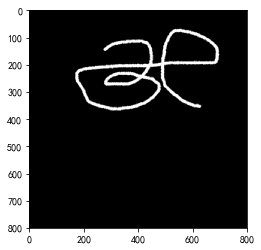

In [55]:
plt.imshow(mask,'gray')

## 修复

In [63]:
dst1 = cv2.inpaint(rgb,mask,3,cv2.INPAINT_TELEA)
dst2 = cv2.inpaint(rgb,mask,3,cv2.INPAINT_NS)

Text(0.5,1,'使用TELEA方法')

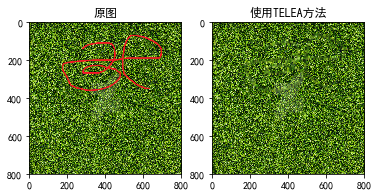

In [64]:
plt.subplot(121)
plt.imshow(rgb)
plt.title(u'原图')
plt.subplot(122)
plt.imshow(dst1)
plt.title(u'使用TELEA方法')

Text(0.5,1,'使用NS方法')

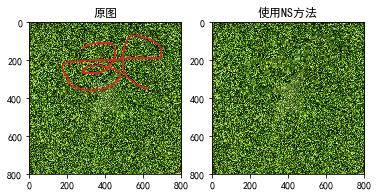

In [65]:
plt.subplot(121)
plt.imshow(rgb)
plt.title(u'原图')
plt.subplot(122)
plt.imshow(dst2)
plt.title(u'使用NS方法')